## Import Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import pylab
import seaborn as sns
sns.set()


import warnings

In [2]:
pd.options.display.max_rows = False
pd.options.display.max_columns = False
warnings.filterwarnings('ignore')

# Load and Transform Data

In [3]:
raw_csv_data = pd.read_csv(r'C:\Users\johnh\Dropbox\Python\UdemyTSA 365 Data Science\Section 3\S_3_L_11\Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

Remember that this exercise is UNIVARIATE

## LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
    

## Augmented Dickey-Fuller Function

In [7]:
def augmented_df_with_data(variable):
    """
    Display the adfuller info in a friendlier fashion
    """
    print('Augmented Dickey-Fuller Test')

    df_test = sts.adfuller(variable)

    dfout = pd.Series(df_test[0:4], index = ['ADF test statistic:','p-value:','# lags used:','# observations:'])

    for key, val in df_test[4].items():

        dfout[f'critical value at ({key}):'] = val

    dfout['Best AIC:'] = df_test[5]
    print(dfout)

## Creating returns

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

## ACF for returns

''

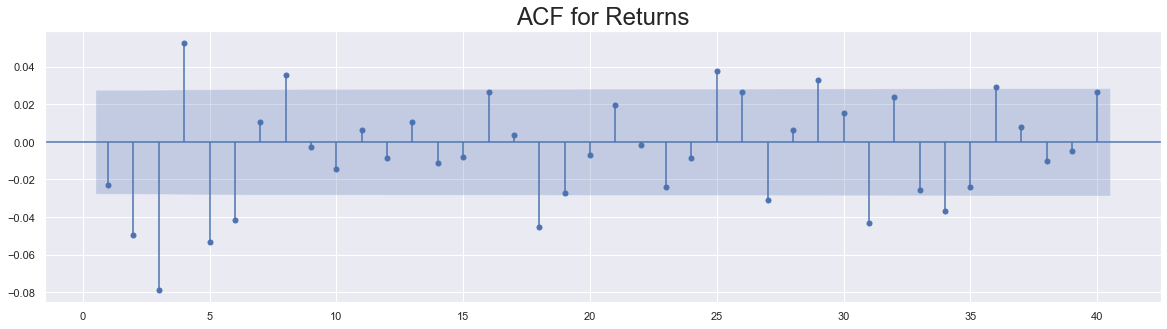

In [9]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.returns[1:], zero= False, lags= 40, ax= ax)
plt.title('ACF for Returns', size= 24)
;

## MA(1) for returns

In [10]:
# ALWAYS REMEMBER THAT PARAMETERS ARE SWITCHED FROM AR (1, 0) TO MA (0, 1)
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 08 May 2022   AIC                          15865.190
Time:                        19:50:50   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [11]:
model_ret_ma_2 = ARMA(df.returns[1:], order = (0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
display(results_ret_ma_2.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 08 May 2022   AIC                          15853.728
Time:                        19:50:50   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.0


In [12]:
model_ret_ma_3 = ARMA(df.returns[1:], order = (0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
display(results_ret_ma_3.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 08 May 2022   AIC                          15818.634
Time:                        19:50:51   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     -4.134      0.000      -0.082      -0.029
ma.L3.returns    -0.0904      0.015     -6.121      0.000      -0.119      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0105           -0.0000j            2.0105           -0.0000
MA.2           -1.3129           -1.9441j            2.3459           -0.3445
MA.3           -1.3129           +1.9441j            2.3459            0.3445
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.0


In [13]:
model_ret_ma_4 = ARMA(df.returns[1:], order = (0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
display(results_ret_ma_4.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 08 May 2022   AIC                          15809.547
Time:                        19:50:53   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     -3.902      0.000      -0.083      -0.027
ma.L3.returns    -0.0922      0.015     -6.306      0.000      -0.121      -0.064
ma.L4.returns     0.0454      0.014      3.338      0.001       0.019       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2257           -1.4206j            1.8763           -0.3633
MA.2           -1.2257           +1.4206j            1.8763            0.3633
MA.3            2.2405           -1.1103j            2.5006           -0.0732
MA.4            2.2405           +1.1103j            2.5006            0.0732
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.001


In [14]:
model_ret_ma_5 = ARMA(df.returns[1:], order = (0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
display(results_ret_ma_5.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 08 May 2022   AIC                          15799.645
Time:                        19:50:56   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     -3.518      0.000      -0.077      -0.022
ma.L3.returns    -0.0852      0.015     -5.799      0.000      -0.114      -0.056
ma.L4.returns     0.0458      0.014      3.374      0.001       0.019       0.072
ma.L5.returns    -0.0500      0.014     -3.454      0.001      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2127           -1.0805j            1.6242           -0.3842
MA.2           -1.2127           +1.0805j            1.6242            0.3842
MA.3            1.7305           -0.0000j            1.7305           -0.0000
MA.4            0.8062           -1.9326j            2.0940           -0.1871
MA.5            0.8062           +1.9326j            2.0940            0.1871
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.001


In [15]:
model_ret_ma_6 = ARMA(df.returns[1:], order = (0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
display(results_ret_ma_6.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 May 2022   AIC                          15794.442
Time:                        19:51:01   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.007


In [16]:
model_ret_ma_7 = ARMA(df.returns[1:], order = (0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
display(results_ret_ma_7.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 May 2022   AIC                          15796.091
Time:                        19:51:08   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     -3.454      0.001      -0.077      -0.021
ma.L3.returns    -0.0821      0.014     -5.789      0.000      -0.110      -0.054
ma.L4.returns     0.0458      0.014      3.360      0.001       0.019       0.073
ma.L5.returns    -0.0486      0.014     -3.381      0.001      -0.077      -0.020
ma.L6.returns    -0.0390      0.014     -2.702      0.007      -0.067      -0.011
ma.L7.returns     0.0085      0.014      0.592      0.554      -0.020       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9690           -1.1814j            1.5279           -0.3593
MA.2           -0.9690           +1.1814j            1.5279            0.3593
MA.3           -2.0397           -0.0000j            2.0397           -0.5000
MA.4            0.7516           -1.5246j            1.6998           -0.1771
MA.5            0.7516           +1.5246j            1.6998            0.1771
MA.6            1.5538           -0.0000j            1.5538           -0.0000
MA.7            5.5175           -0.0000j            5.5175           -0.0000
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.554


In [17]:
model_ret_ma_8 = ARMA(df.returns[1:], order = (0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
display(results_ret_ma_8.summary())
print("\n######################################################")
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 08 May 2022   AIC                          15791.205
Time:                        19:51:17   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""


######################################################

LLR test p-value = 0.009


In [18]:
print('REMEMBER: You need to test LLR when dealing with an INTERMEDIARY lag that is NOT significant like (0,7)')
print("\nLLR test p-value from lag 6 to lag 8 = " + str(LLR_test(model_ret_ma_6, model_ret_ma_8, DF= 2)))

REMEMBER: You need to test LLR when dealing with an INTERMEDIARY lag that is NOT significant like (0,7)

LLR test p-value from lag 6 to lag 8 = 0.027


## Residual for returns

In [19]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [20]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356


In [21]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.164

''

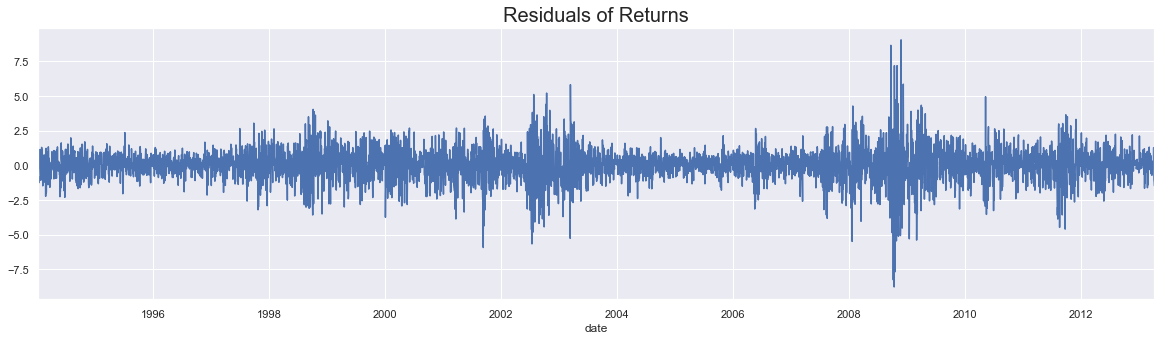

In [22]:
df.res_ret_ma_8[1:].plot(figsize = (20, 5))
plt.title('Residuals of Returns', size = 20)
;

In [23]:
augmented_df_with_data(df.res_ret_ma_8[2:])

Augmented Dickey-Fuller Test
ADF test statistic:           -70.835815
p-value:                        0.000000
# lags used:                    0.000000
# observations:              5018.000000
critical value at (1%):        -3.431654
critical value at (5%):        -2.862116
critical value at (10%):       -2.567077
Best AIC:                   15684.052185
dtype: float64


''

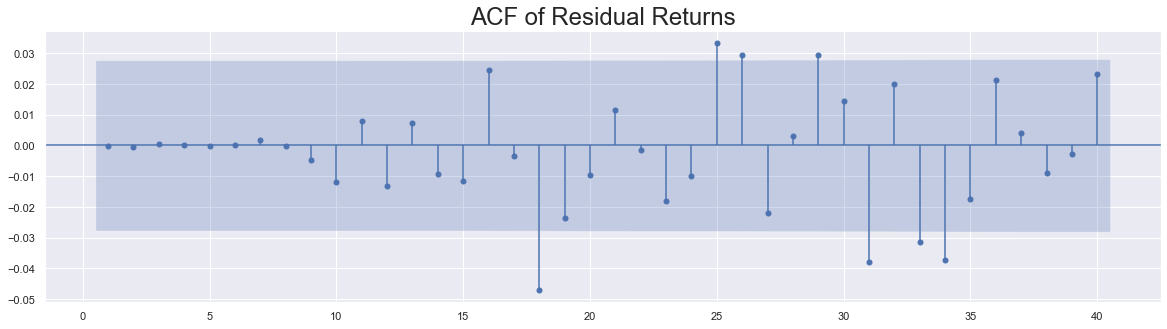

In [24]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.res_ret_ma_8[2:], zero= False, lags= 40, ax= ax)
plt.title('ACF of Residual Returns', size= 24)
;

## Residual for returns for MA(6) -- Homework

In [25]:
df['res_ret_ma_6'] = results_ret_ma_6.resid[1:]

In [26]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_6.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_6.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.357


''

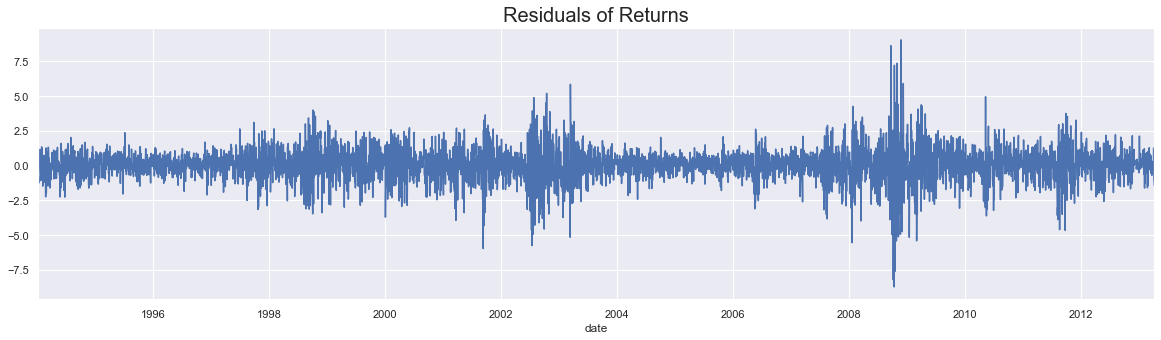

In [27]:
df.res_ret_ma_6[1:].plot(figsize = (20, 5))
plt.title('Residuals of Returns', size = 20)
;

In [28]:
round(sqrt(df.res_ret_ma_6.var()),3)

1.165

## Normalized Returns

In [29]:
# REMEMBER: BENCH RETURN is the return we got in the very first day of our series
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [30]:
# df.head()

''

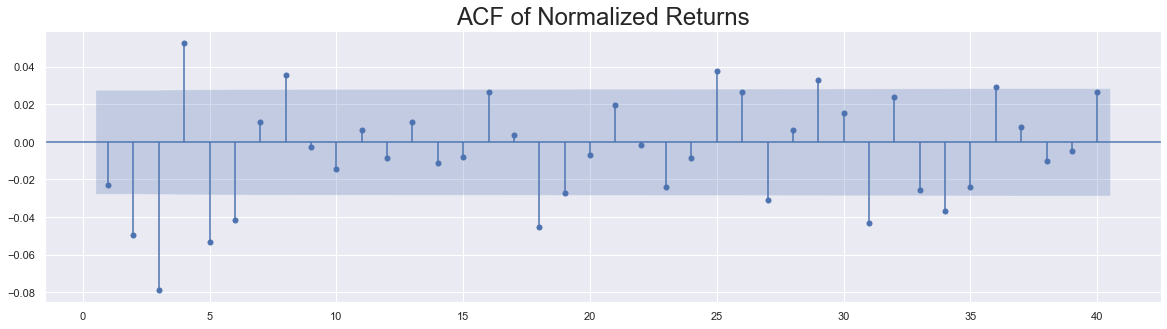

In [31]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.norm_ret[1:], zero= False, lags= 40, ax= ax)
plt.title('ACF of Normalized Returns', size= 24)
;

In [32]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order= (0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
display(results_norm_ret_ma_8.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sun, 08 May 2022   AIC                          80635.194
Time:                        19:51:37   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.311       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [33]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid[1:]

''

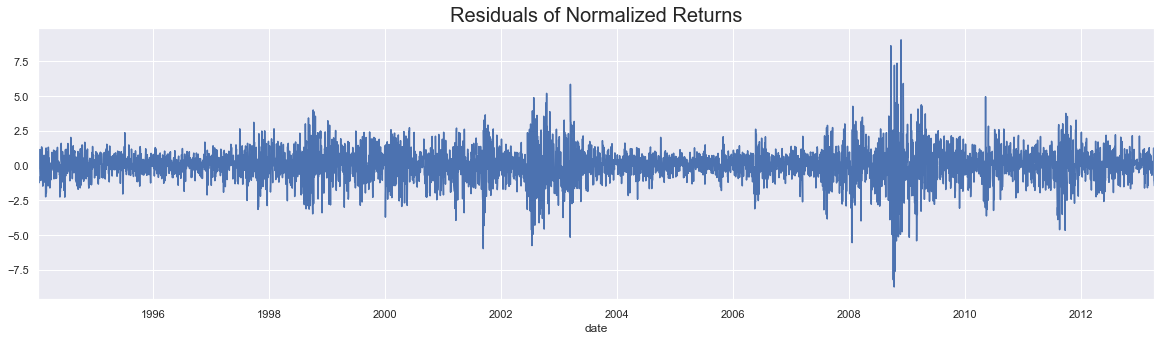

In [34]:
df.res_ret_ma_6[1:].plot(figsize = (20, 5))
plt.title('Residuals of Normalized Returns', size = 20)
;

In [35]:
model_norm_ret_ma_6 = ARMA(df.norm_ret[1:], order= (0,6))
results_norm_ret_ma_6 = model_norm_ret_ma_6.fit()
display(results_norm_ret_ma_6.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood              -40311.216
Method:                       css-mle   S.D. of innovations            743.358
Date:                Sun, 08 May 2022   AIC                          80638.431
Time:                        19:51:40   BIC                          80690.601
Sample:                    01-10-1994   HQIC                         80656.712
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.442     -1.418      0.156     -28.519       4.572
ma.L1.norm_ret    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.norm_ret    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.norm_ret    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.norm_ret     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.norm_ret    -0.0484      0.014     -3.370      0.001      -0.077      -0.020
ma.L6.norm_ret    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3890           -0.0000j            2.3890           -0.5000
-----------------------------------------------------------------------------
"""

In [36]:
df['res_norm_ret_ma_6'] = results_norm_ret_ma_6.resid[1:]

''

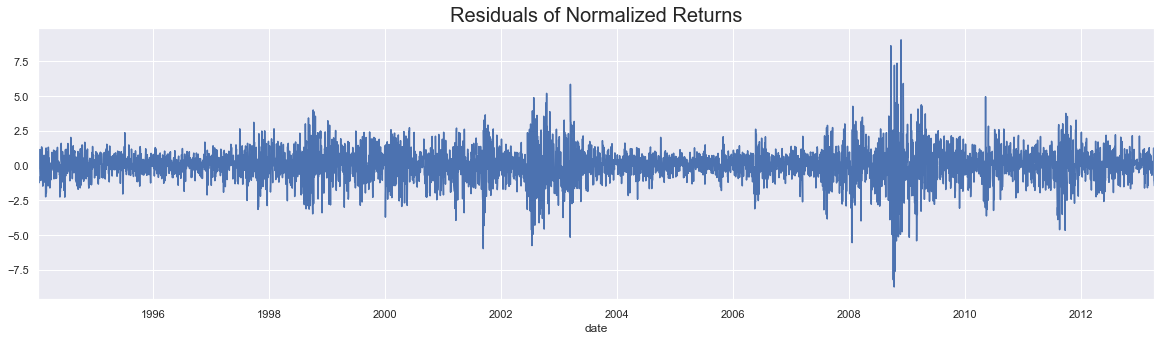

In [37]:
df.res_ret_ma_6[1:].plot(figsize = (20, 5))
plt.title('Residuals of Normalized Returns', size = 20)
;

In [38]:
print("\nLLR test p-value from lag 6 to lag 8 = " + str(LLR_test(model_norm_ret_ma_6, model_norm_ret_ma_8, DF= 2)))


LLR test p-value from lag 6 to lag 8 = 0.027


## MA Model for Prices

''

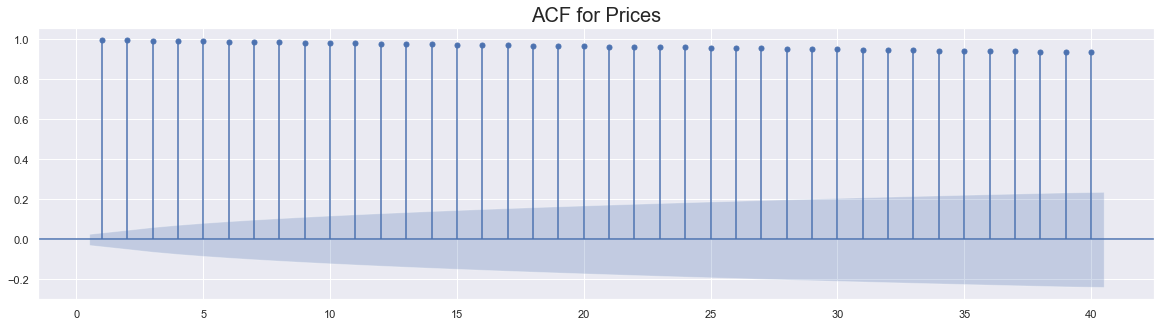

In [39]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.market_value, zero= False, lags= 40, ax = ax)
plt.title('ACF for Prices', size = 20)
;

In [40]:
model_ma_1 = ARMA(df.market_value, order= (0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Sun, 08 May 2022   AIC                          77264.000
Time:                        19:51:48   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6029     14.660    347.187      0.000    5060.871    5118.335
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

## ARMA (1,1)

In [41]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order = (1,1))
results__ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results__ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 08 May 2022   AIC                          15841.000
Time:                        19:51:50   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
model_ret_ar_1 = ARMA(df.returns[1:], order= (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order= (0,1))

In [43]:
print("\n######################################################")
print("\nLLR test p-value ARMA vs AR = " + str(LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1)))
print("\nLLR test p-value ARMA vs MA = " + str(LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1)))


######################################################

LLR test p-value ARMA vs AR = 0.0

LLR test p-value ARMA vs MA = 0.0


## Higher Lag Arma Models

In [44]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order= (3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [45]:
# REMEMBER: ARMA (3,3) has 6 coefficients (3 + 3) and ARMA(1,1) has 2 coefficients (1 + 1).  Therefore, 6 - 2 coefficients
# is equal 4 degree of freedom

print("\n######################################################")
print("\nLLR test p-value ARMA (3,3) vs ARMA (1,1) = " + str(LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF=4)))


######################################################

LLR test p-value ARMA vs AR = 0.0


In [46]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 08 May 2022   AIC                          15803.030
Time:                        20:20:33   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [48]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order = (3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 08 May 2022   AIC                          15805.495
Time:                        20:24:38   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.001       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [49]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order= (2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 08 May 2022   AIC                          15805.174
Time:                        20:29:21   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.797      -0.041
ma.L1.returns     0.5378      0.090      6.000      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5096           -0.0000j            4.5096           -0.0000
-----------------------------------------------------------------------------
"""

In [50]:
print("\n######################################################")
print("\nLLR test p-value ARMA (3,3) vs ARMA (2,3) = " + str(LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)))
print("\nLLR test p-value ARMA (3,3) vs ARMA (3,2) = " + str(LLR_test(model_ret_ar_3_ma_2, model_ret_ar_3_ma_3)))


######################################################

LLR test p-value ARMA (3,3) vs ARMA (2,3) = 0.042

LLR test p-value ARMA (3,3) vs ARMA (3,2) = 0.035


In [51]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order= (3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 08 May 2022   AIC                          15810.144
Time:                        20:37:19   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
print("\n######################################################")
print("\nLLR test p-value ARMA (3,3) vs ARMA (3,1) = " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_3, DF= 2)))


######################################################

LLR test p-value ARMA (3,3) vs ARMA (3,1) = 0.004


In [54]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order= (1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 08 May 2022   AIC                          15805.676
Time:                        20:41:03   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095      4.691      0.000       0.260       0.634
ma.L2.returns    -0.0637      0.015     -4.113      0.000      -0.094      -0.033
ma.L3.returns    -0.1182      0.014     -8.200      0.000      -0.146      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1282           +0.0000j            2.1282            0.5000
MA.1           -1.4882           -1.1206j            1.8629           -0.3973
MA.2           -1.4882           +1.1206j            1.8629            0.3973
MA.3            2.4376           -0.0000j            2.4376           -0.0000
-----------------------------------------------------------------------------
"""

In [55]:
print("\nLLR test p-value ARMA (3,3) vs ARMA (1,3) = " + str(LLR_test(model_ret_ar_1_ma_3, model_ret_ar_3_ma_3, DF= 2)))


LLR test p-value ARMA (3,3) vs ARMA (1,3) = 0.036


In [56]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order= (2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Sun, 08 May 2022   AIC                          15838.446
Time:                        20:42:34   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     -0.884      0.377      -0.503       0.190
ma.L1.returns    -0.8105      0.239     -3.388      0.001      -1.279      -0.342
ma.L2.returns     0.1177      0.187      0.628      0.530      -0.250       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5017           -0.3738j            2.5295           -0.0236
AR.2            2.5017           +0.3738j            2.5295            0.0236
MA.1            1.6107           +0.0000j            1.6107            0.0000
MA.2            5.2741           +0.0000j            5.2741            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
print("\nLLR test p-value ARMA (3,3) vs ARMA (2,2) = " + str(LLR_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_3, DF= 2)))


LLR test p-value ARMA (3,3) vs ARMA (2,2) = 0.0


In [58]:
model_ret_ar_2_ma_1 = ARMA(df.returns[1:], order= (2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
results_ret_ar_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 1)   Log Likelihood               -7913.456
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 08 May 2022   AIC                          15836.913
Time:                        20:46:20   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.returns     0.6541      0.093      7.068      0.000       0.473       0.835
ar.L2.returns    -0.0433      0.017     -2.593      0.010      -0.076      -0.011
ma.L1.returns    -0.6829      0.092     -7.431      0.000      -0.863      -0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7262           +0.0000j            1.7262            0.0000
AR.2           13.3730           +0.0000j           13.3730            0.0000
MA.1            1.4644           +0.0000j            1.4644            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
print("\nLLR test p-value ARMA (3,3) vs ARMA (2,1) = " + str(LLR_test(model_ret_ar_2_ma_1, model_ret_ar_3_ma_3, DF= 3)))


LLR test p-value ARMA (3,3) vs ARMA (2,1) = 0.0


In [61]:
model_ret_ar_1_ma_2 = ARMA(df.returns[1:], order= (1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
results_ret_ar_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 2)   Log Likelihood               -7913.670
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 08 May 2022   AIC                          15837.341
Time:                        20:48:31   BIC                          15869.947
Sample:                    01-10-1994   HQIC                         15848.766
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.410      0.158      -0.007       0.045
ar.L1.returns     0.6169      0.100      6.191      0.000       0.422       0.812
ma.L1.returns    -0.6471      0.100     -6.496      0.000      -0.842      -0.452
ma.L2.returns    -0.0422      0.017     -2.545      0.011      -0.075      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6210           +0.0000j            1.6210            0.0000
MA.1            1.4150           +0.0000j            1.4150            0.0000
MA.2          -16.7599           +0.0000j           16.7599            0.5000
-----------------------------------------------------------------------------
"""

In [62]:
print("\nLLR test p-value ARMA (3,3) vs ARMA (1,2) = " + str(LLR_test(model_ret_ar_1_ma_2, model_ret_ar_3_ma_3, DF= 3)))


LLR test p-value ARMA (3,3) vs ARMA (1,2) = 0.0


Let's compare some of the models within our list

In [63]:
print("\nLLR test p-value ARMA (3,2) vs ARMA (3,1) = " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))


LLR test p-value ARMA (3,2) vs ARMA (3,1) = 0.01


In [65]:
print('\n ARMA(3,2)  \tLL = ', results_ret_ar_3_ma_2.llf, '\tAIC = ', results_ret_ar_3_ma_2.aic)
print('\n ARMA(3,2)  \tLL = ', results_ret_ar_1_ma_3.llf, '\tAIC = ', results_ret_ar_1_ma_3.aic)


 ARMA(3,2)  	LL =  -7895.747458514545 	AIC =  15805.49491702909

 ARMA(3,2)  	LL =  -7896.837893752805 	AIC =  15805.67578750561


## Residuals for Returns

In [66]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

In [67]:
df.head()

,market_value,returns,res_ret_ma_8,res_ret_ma_6,norm_ret,res_norm_ret_ma_8,res_norm_ret_ma_6,res_ret_ar_3_ma_2
date,,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,NaN,100.000000,NaN,NaN,NaN
1994-01-11,3413.77,-0.779229,-0.802111,-0.802083,497.260711,511.768556,511.743814,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464,-1.268789,780.443046,810.002390,809.564821,-1.269912
1994-01-13,3360.01,-0.356166,-0.464780,-0.461319,227.285567,296.489208,294.273673,-0.463250


''

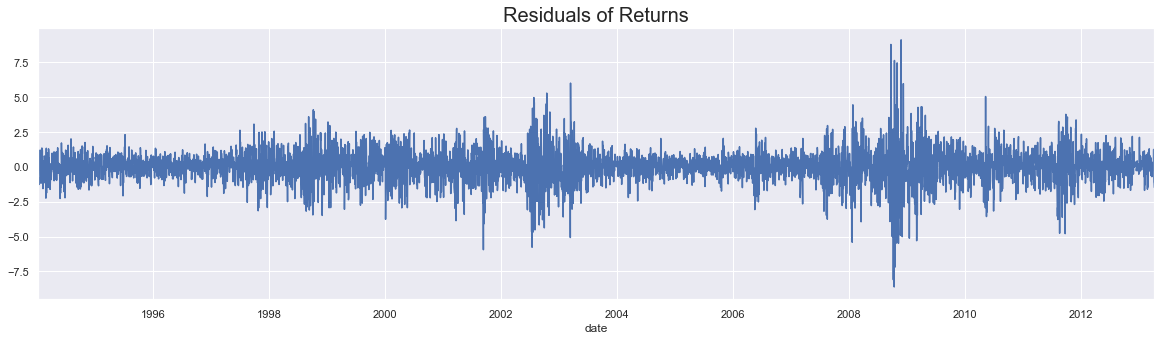

In [68]:
df.res_ret_ar_3_ma_2.plot(figsize = (20, 5))
plt.title('Residuals of Returns', size = 20)
;

''

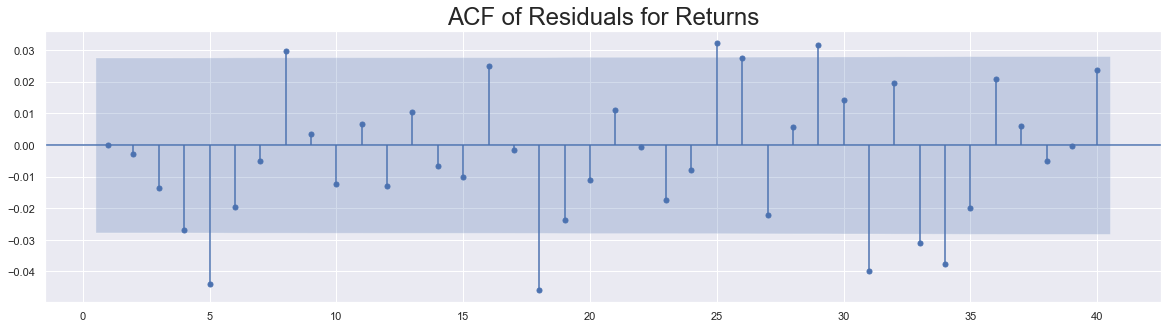

In [69]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero= False, lags= 40, ax= ax)
plt.title('ACF of Residuals for Returns', size= 24)
;

## Reevaluating Model Selection

In [70]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order= (5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sun, 08 May 2022   AIC                          15788.321
Time:                        21:42:23   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [71]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order= (5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 May 2022   AIC                          15794.623
Time:                        21:44:34   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

In [73]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order= (1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 08 May 2022   AIC                          15797.947
Time:                        21:45:53   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     -2.332      0.020      -0.650      -0.056
ma.L2.returns    -0.0404      0.015     -2.624      0.009      -0.071      -0.010
ma.L3.returns    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.returns     0.0742      0.020      3.771      0.000       0.036       0.113
ma.L5.returns    -0.0683      0.015     -4.660      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0443           +0.0000j            3.0443            0.0000
MA.1           -1.1897           -1.1548j            1.6580           -0.3774
MA.2           -1.1897           +1.1548j            1.6580            0.3774
MA.3            1.5041           -0.0000j            1.5041           -0.0000
MA.4            0.9809           -1.6057j            1.8815           -0.1627
MA.5            0.9809           +1.6057j            1.8815            0.1627
-----------------------------------------------------------------------------
"""

In [75]:
print('\n ARMA(5,1)  \tLL = ', results_ret_ar_5_ma_1.llf, '\tAIC = ', results_ret_ar_5_ma_1.aic)
print('\n ARMA(1,5)  \tLL = ', results_ret_ar_1_ma_5.llf, '\tAIC = ', results_ret_ar_1_ma_5.aic)


 ARMA(5,1)  	LL =  -7889.311282945808 	AIC =  15794.622565891616

 ARMA(1,5)  	LL =  -7890.973460209531 	AIC =  15797.946920419063


In [76]:
print('\n ARMA(3,1)  \tLL = ', results_ret_ar_3_ma_2.llf, '\tAIC = ', results_ret_ar_3_ma_2.aic)


 ARMA(3,1)  	LL =  -7895.747458514545 	AIC =  15805.49491702909


## Residuals for the New Model

In [77]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

''

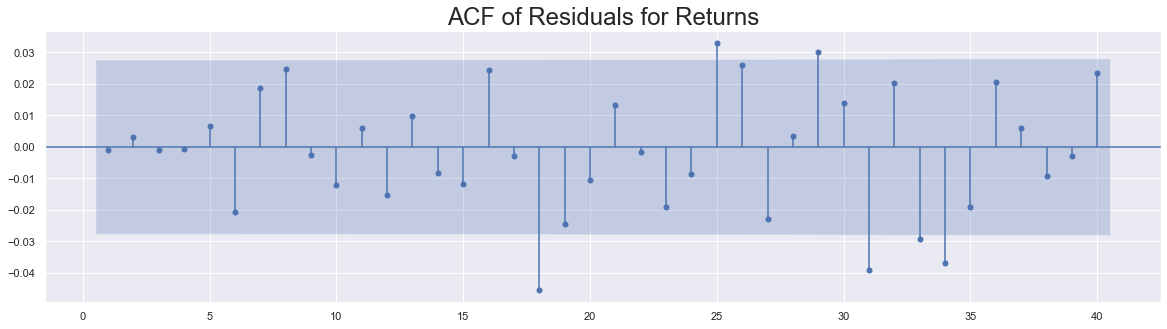

In [79]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero= False, lags= 40, ax= ax)
plt.title('ACF of Residuals for Returns', size= 24)
;

## ARMA Models for Prices

''

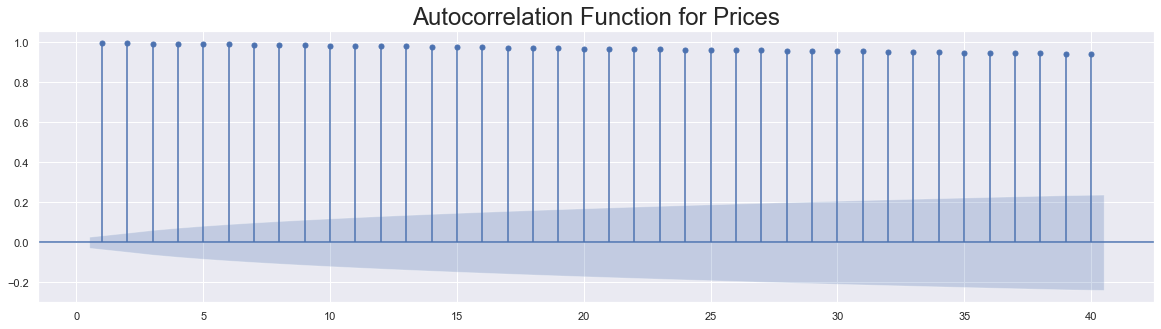

In [80]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.market_value, unbiased= True, zero= False, lags= 40, ax= ax)
plt.title('Autocorrelation Function for Prices', size= 24)
;

''

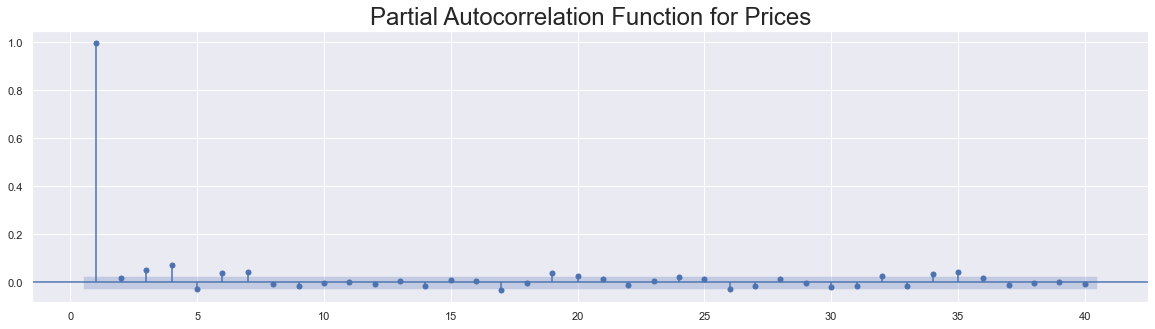

In [81]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_pacf(df.market_value, zero= False, lags= 40, alpha = 0.05, method = ('ols'), ax= ax)
plt.title('Partial Autocorrelation Function for Prices', size= 24)
;

In [82]:
model_ar_1_ma_1 = ARMA(df.market_value, order= (1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Sun, 08 May 2022   AIC                          55251.579
Time:                        22:05:33   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    496.762     10.246      0.000    4116.005    6063.277
ar.L1.market_value     0.9985      0.001   1323.185      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5202           +0.0000j           52.5202            0.0000
-----------------------------------------------------------------------------
"""

In [83]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

In [84]:
df.head()

,market_value,returns,res_ret_ma_8,res_ret_ma_6,norm_ret,res_norm_ret_ma_8,res_norm_ret_ma_6,res_ret_ar_3_ma_2,res_ret_ar_5_ma_1,res_ar_1_ma_1
date,,,,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1643.661086
1994-01-10,3440.58,-0.156704,NaN,NaN,100.000000,NaN,NaN,NaN,-0.175616,-7.905774
1994-01-11,3413.77,-0.779229,-0.802111,-0.802083,497.260711,511.768556,511.743814,-0.802111,-0.802191,-29.378853
1994-01-12,3372.02,-1.222988,-1.269464,-1.268789,780.443046,810.002390,809.564821,-1.269912,-1.270020,-44.767078
1994-01-13,3360.01,-0.356166,-0.464780,-0.461319,227.285567,296.489208,294.273673,-0.463250,-0.466055,-15.381302


''

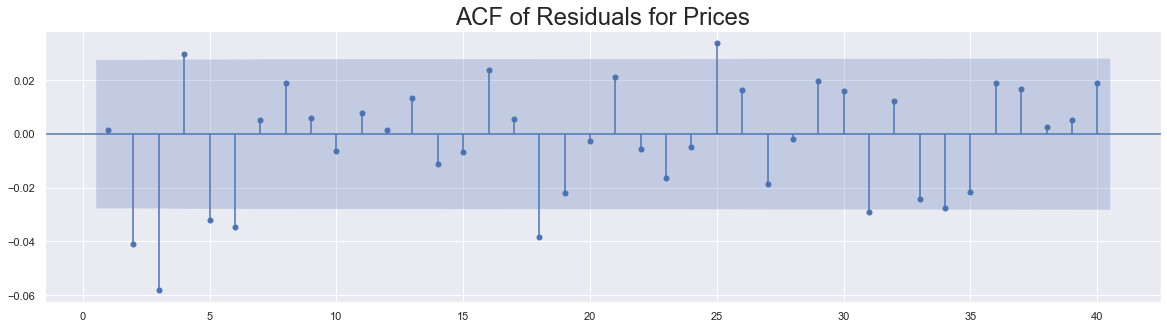

In [85]:
fig, ax = plt.subplots(figsize = (20, 5))
sgt.plot_acf(df.res_ar_1_ma_1, zero= False, lags= 40, ax= ax)
plt.title('ACF of Residuals for Prices', size= 24)
;

In [92]:
model_ar_6_ma_6 = ARMA(df.market_value, order= (6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Sun, 08 May 2022   AIC                          55203.864
Time:                        22:11:34   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6478    567.800      8.964      0.000    3976.781    6202.515
ar.L1.market_value     1.9278      0.032     59.723      0.000       1.865       1.991
ar.L2.market_value    -1.7363      0.040    -43.248      0.000      -1.815      -1.658
ar.L3.market_value     1.2678      0.035     36.743      0.000       1.200       1.335
ar.L4.market_value    -0.2376      0.155     -1.530      0.126      -0.542       0.067
ar.L5.market_value    -0.4062      0.163     -2.499      0.012      -0.725      -0.088
ar.L6.market_value     0.1842      0.049      3.765      0.000       0.088       0.280
ma.L1.market_value    -0.9489      0.035    -26.967      0.000      -1.018      -0.880
ma.L2.market_value     0.7801      0.032     24.179      0.000       0.717       0.843
ma.L3.market_value    -0.5084      0.031    -16.296      0.000      -0.570      -0.447
ma.L4.market_value    -0.1559      0.156     -1.000      0.317      -0.462       0.150
ma.L5.market_value     0.0954      0.057      1.681      0.093      -0.016       0.207
ma.L6.market_value     0.0670      0.024      2.827      0.005       0.021       0.113
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0856           -1.0503j            1.0538           -0.2371
AR.2            0.0856           +1.0503j            1.0538            0.2371
AR.3           -2.0254           -0.0000j            2.0254           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5293           -0.2696j            1.5529           -0.0278
AR.6            1.5293           +0.2696j            1.5529            0.0278
MA.1            0.1028           -1.0613j            1.0663           -0.2346
MA.2            0.1028           +1.0613j            1.0663            0.2346
MA.3            1.3617           -0.2806j            1.3903           -0.0323
MA.4            1.3617           +0.2806j            1.3903            0.0323
MA.5           -2.1768           -1.4337j            2.6065           -0.4073
MA.6           -2.1768           +1.4337j            2.6065            0.4073
-----------------------------------------------------------------------------
"""